# HW 2: Supervised Learning Models

## Part 1: Regression on California Test Scores

import packages and libraries

In [113]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt

read in the dataset and remove the last 2 columns and non-numeric columns

In [114]:
df=pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/Ecdat/Caschool.csv")
df = df.iloc[:, 1:-2]
df = df.drop(['county','district','grspan'], axis=1)
df.head(5)

,distcod,enrltot,teachers,calwpct,mealpct,computer,testscr,compstu,expnstu,str,avginc,elpct
0,75119,195,10.900000,0.510200,2.040800,67,690.799988,0.343590,6384.911133,17.889910,22.690001,0.000000
1,61499,240,11.150000,15.416700,47.916698,101,661.200012,0.420833,5099.380859,21.524664,9.824000,4.583333
2,61549,1550,82.900002,55.032299,76.322601,169,643.599976,0.109032,5501.954590,18.697226,8.978000,30.000002
3,61457,243,14.000000,36.475399,77.049202,85,647.700012,0.349794,7101.831055,17.357143,8.978000,0.000000
4,61523,1335,71.500000,33.108601,78.427002,171,640.849976,0.128090,5235.987793,18.671329,9.080333,13.857677


### 1.1 Visualize the univariate distribution of the target feature and each of the three continuous explanatory variables that you think are likely to have a relationship with the target feature.   

#### Distribution of target feature (testscr)

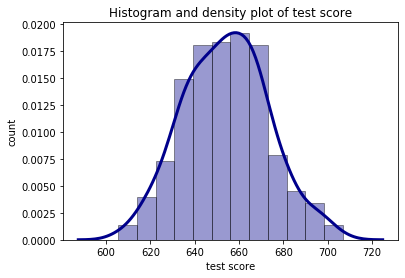

In [26]:
sns.distplot(df['testscr'], hist=True, kde=True, 
             bins=12, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3})

plt.xlabel('test score')
plt.ylabel('count')
plt.title('Histogram and density plot of test score')
plt.show()

#### Distribution of percent qualifying for CalWorks

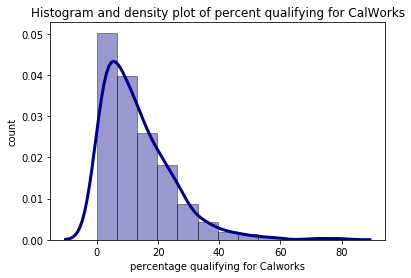

In [27]:
sns.distplot(df['calwpct'], hist=True, kde=True, 
             bins=12, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3})

plt.xlabel('percentage qualifying for Calworks')
plt.ylabel('count')
plt.title('Histogram and density plot of percent qualifying for CalWorks')
plt.show()

#### Distribution of percent qualifying for reduced-price lunch

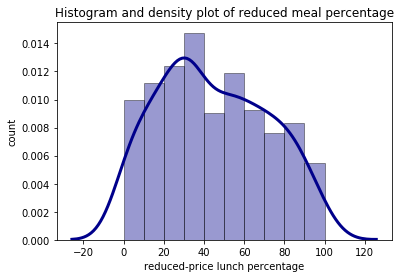

In [28]:
sns.distplot(df['mealpct'], hist=True, kde=True, 
             bins=10, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3})

plt.xlabel('reduced-price lunch percentage')
plt.ylabel('count')
plt.title('Histogram and density plot of reduced meal percentage')
plt.show()

#### Distribution of district average income

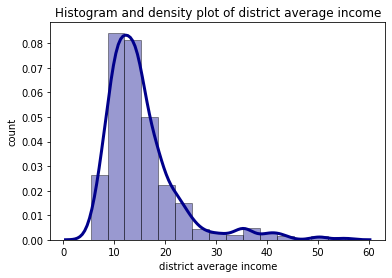

In [29]:
sns.distplot(df['avginc'], hist=True, kde=True, 
             bins=15, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3})

plt.xlabel('district average income')
plt.ylabel('count')
plt.title('Histogram and density plot of district average income')
plt.show()

### 1.2 Visualize the dependency of the target on each feature from 1.1.

#### percent qualifying for CalWorks and test score

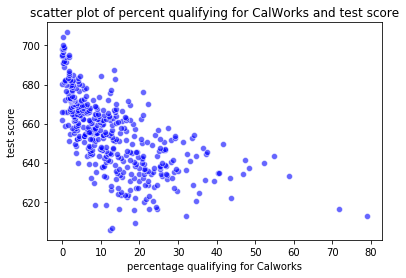

In [30]:
sp = sns.scatterplot(x=df['calwpct'], y=df['testscr'],alpha=0.6,color='blue')
plt.xlabel('percentage qualifying for Calworks')
plt.ylabel('test score')
plt.title('scatter plot of percent qualifying for CalWorks and test score')
plt.show()

#### percent qualifying for reduced-price lunch and test score

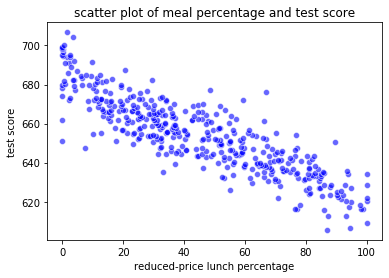

In [31]:
sp = sns.scatterplot(x=df['mealpct'], y=df['testscr'],alpha=0.6,color='blue')
plt.xlabel('reduced-price lunch percentage')
plt.ylabel('test score')
plt.title('scatter plot of meal percentage and test score')
plt.show()

#### district average income and test score

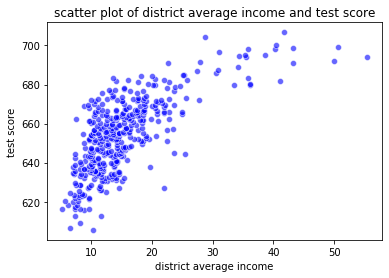

In [32]:
sp = sns.scatterplot(x=df['avginc'], y=df['testscr'],alpha=0.6,color='blue')
plt.xlabel('district average income')
plt.ylabel('test score')
plt.title('scatter plot of district average income and test score')
plt.show()

### 1.3 Split data in training and test set. Build models that evaluate the relationship between all available X variables in the California test dataset and the target variable. Evaluate KNN for regression, Linear Regression (OLS), Ridge, and Lasso using cross-validation with the default parameters. Does scaling the data with the StandardScaler help?

#### split data

In [115]:
X = df.drop(['testscr'], axis=1)
y = df.loc[:,'testscr']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [59]:
#avoid warnings
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

#### KNN for regression

In [60]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor().fit(X_train, y_train)

#cv
from sklearn.model_selection import cross_val_score
cross_val_score(KNeighborsRegressor(), X_train, y_train).mean()

-0.13505115825046543

#### Linear Regression (OLS)

In [61]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression().fit(X_train, y_train)
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

#cv
print("Cross Validation score: {:.2f}".format(cross_val_score(LinearRegression(), X_train, y_train).mean()))

lr.coef_: [-1.70462259e-04  2.41247060e-04 -1.03033331e-02 -1.18275084e-01
 -3.61074234e-01  2.45241913e-03 -2.18984104e+00  1.92827832e-03
 -3.86035232e-01  5.19720659e-01 -1.96553184e-01]
lr.intercept_: 675.843551429522
Cross Validation score: 0.77


#### Ridge 

In [62]:
from sklearn.linear_model import Ridge
ridge=Ridge().fit(X_train,y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))
print("ridge.coef_: {}".format(ridge.coef_))

#cv
print("Cross Validation score: {:.2f}".format(cross_val_score(Ridge(), X_train, y_train).mean()))

Training set score: 0.81
Test set score: 0.80
ridge.coef_: [-1.69321493e-04  2.11884091e-04 -9.23649776e-03 -1.17298244e-01
 -3.61600983e-01  2.25764563e-03 -1.03008705e+00  1.91230161e-03
 -3.76670293e-01  5.19077851e-01 -1.95788894e-01]
Cross Validation score: 0.77


#### Lasso

In [63]:
from sklearn.linear_model import Lasso
lasso=Lasso().fit(X_train,y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))
print("lasso.coef_: {}".format(lasso.coef_))

#cv
print("Cross Validation score: {:.2f}".format(cross_val_score(Lasso(), X_train, y_train).mean()))

Training set score: 0.81
Test set score: 0.80
Number of features used: 9
lasso.coef_: [-1.58542537e-04 -3.86049765e-04  2.99467413e-03 -1.00625116e-01
 -3.77114307e-01  2.00266583e-03 -0.00000000e+00  2.54123082e-03
 -0.00000000e+00  4.83830360e-01 -1.85390813e-01]
Cross Validation score: 0.78


/Users/liyidan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 60.53876346228208, tolerance: 10.135477633342425
  positive)
/Users/liyidan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 115.63531307454832, tolerance: 6.835283604888848
  positive)
/Users/liyidan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3475.001547921963, tolerance: 6.7078127114330615
  positive)


#### Does scaling the data with the StandardScaler help?

Scaling the data

In [117]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### KNN for Regression on Scaled data

In [118]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor().fit(X_train_scaled, y_train)

#cv
from sklearn.model_selection import cross_val_score
cross_val_score(KNeighborsRegressor(), X_train_scaled, y_train).mean()

0.6854675021658533

#### Linear Regression (OLS) on Scaled data

In [66]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression().fit(X_train_scaled, y_train)
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

#cv
print("Cross Validation score: {:.2f}".format(cross_val_score(LinearRegression(), X_train_scaled, y_train).mean()))

lr.coef_: [-0.59635883  1.00716914 -2.06009821 -1.32013716 -9.70768955  1.14073002
 -0.14168279  1.18787443 -0.71109365  3.7378696  -3.46245587]
lr.intercept_: 654.2720646933902
Cross Validation score: 0.77


#### Ridge on Scaled Data

In [67]:
from sklearn.linear_model import Ridge
ridge=Ridge().fit(X_train_scaled,y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train_scaled, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test_scaled, y_test)))
print("ridge.coef_: {}".format(ridge.coef_))

#cv
print("Cross Validation score: {:.2f}".format(cross_val_score(Ridge(), X_train_scaled, y_train).mean()))

Training set score: 0.81
Test set score: 0.80
ridge.coef_: [-0.59521249  0.04607644 -1.00088006 -1.38744984 -9.59006603  1.03502879
 -0.12383222  1.19113891 -0.66989081  3.75629075 -3.50555405]
Cross Validation score: 0.78


#### Lasso on Scaled Data

In [68]:
from sklearn.linear_model import Lasso
lasso=Lasso().fit(X_train_scaled,y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train_scaled, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test_scaled, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))
print("lasso.coef_: {}".format(lasso.coef_))

#cv
print("Cross Validation score: {:.2f}".format(cross_val_score(Lasso(), X_train_scaled, y_train).mean()))

Training set score: 0.80
Test set score: 0.79
Number of features used: 5
lasso.coef_: [ -0.          -0.          -0.          -0.         -10.63994934
  -0.           0.           0.45852217  -0.22704338   3.32363837
  -2.5568067 ]
Cross Validation score: 0.78


#### Does scaling the data with the StandardScaler help?
The effect of scaling is significant for knn, and is helpful for ridge, but not for lasso and ols.

### 1.4 Tune the parameters of the models where possible using GridSearchCV. Do the results improve?

#### KNN for Regression with Scaled Data and GridSearchCV

In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
param_grid = {'n_neighbors': np.arange(1, 15, 2)}
grid = GridSearchCV(KNeighborsRegressor(), param_grid=param_grid, cv=10)
grid.fit(X_train_scaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.3f}".format(grid.score(X_test_scaled, y_test)))

best mean cross-validation score: 0.709
best parameters: {'n_neighbors': 11}
test-set score: 0.734


/Users/liyidan/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


#### Ridge with Scaled Data and GridSearchCV

In [70]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
param_grid = {'alpha': [0.01,0.1,1,10,100]}
grid = GridSearchCV(Ridge(), param_grid=param_grid, cv=10)
grid.fit(X_train_scaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.3f}".format(grid.score(X_test_scaled, y_test)))

best mean cross-validation score: 0.784
best parameters: {'alpha': 10}
test-set score: 0.797


#### Lasso with Scaled Data and GridSearchCV

In [71]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
param_grid = {'alpha': [0.01,0.1,1,10,100],'max_iter': [1000,10000,100000]}
grid = GridSearchCV(Lasso(), param_grid=param_grid, cv=10)
grid.fit(X_train_scaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.3f}".format(grid.score(X_test_scaled, y_test)))

best mean cross-validation score: 0.784
best parameters: {'alpha': 0.1, 'max_iter': 1000}
test-set score: 0.800


/Users/liyidan/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


#### Do the results improve?
Yes, the results improved for all 3 models and knn improved most.

### 1.5 Compare the coefficients of your two best linear models (not knn), do they agree on which features are important?



#### model 1: Ridge, alpha=10

In [72]:
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=10).fit(X_train_scaled, y_train)
print("ridge.coef_: {}".format(ridge.coef_))

ridge.coef_: [-0.58500687 -0.33048107 -0.38327094 -1.77593768 -8.76381574  0.81400225
 -0.0727236   1.14818731 -0.66275012  3.92668513 -3.78341576]


#### model 2: Lasso, alpha=0.1, max_iter=1000

In [73]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.1,max_iter=1000).fit(X_train_scaled, y_train)
print("lasso.coef_: {}".format(lasso.coef_))

lasso.coef_: [-0.45310488 -0.         -0.         -1.12528272 -9.88263462  0.
  0.          1.09836735 -0.60534042  3.71140296 -3.33943472]


#### Do they agree on which features are important?
Not quite. Lasso removed enrltot, teachers, computer, compstu while Ridge only gave compstu a small weight but variables enrltot, teachers, computer still have impact on the model.

### 1.6 Discuss which final model you would choose to predict new data

I would choose lasso with alpha=0.1 and max_iter=1000. Because it has the same accuracy from cross validation while having less variables included, meaning that it's a more compact model.

## Part 2: Classification on red and white wine characteristics

In [74]:
import os
os.chdir('/Users/liyidan/desktop/QMSS ML/HW2') 
white=pd.read_csv("winequality-white.csv",sep=';')
red=pd.read_csv("winequality-red.csv",sep=';')
white['winetype'] = 0
red['winetype'] =1
wine=pd.concat([white,red])
wine.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,winetype
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


### 2.1 Visualize the univariate distribution of the target feature and each of the three explanatory variables that you think are likely to have a relationship with the target feature.   

#### Distribution of wine type

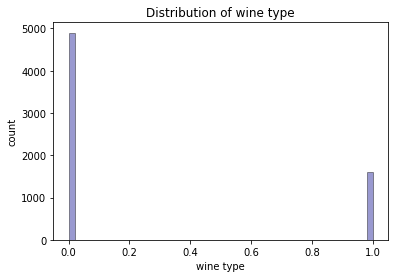

In [75]:
sns.distplot(wine['winetype'], kde=False,color = 'darkblue', 
             hist_kws={'edgecolor':'black'})
plt.xlabel('wine type')
plt.ylabel('count')
plt.title('Distribution of wine type')
plt.show()

#### Distribution of fixed acidity

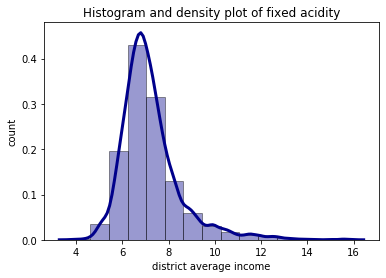

In [76]:
sns.distplot(wine['fixed acidity'], hist=True, kde=True, 
             bins=15, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3})

plt.xlabel('district average income')
plt.ylabel('count')
plt.title('Histogram and density plot of fixed acidity')
plt.show()

#### Distribution of chlorides

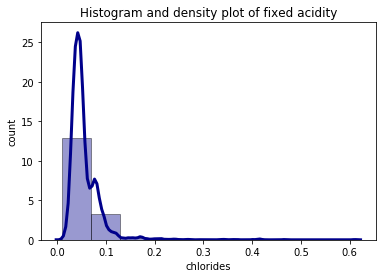

In [77]:
sns.distplot(wine['chlorides'], hist=True, kde=True, 
             bins=10, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3})

plt.xlabel('chlorides')
plt.ylabel('count')
plt.title('Histogram and density plot of fixed acidity')
plt.show()

#### Distribution of pH

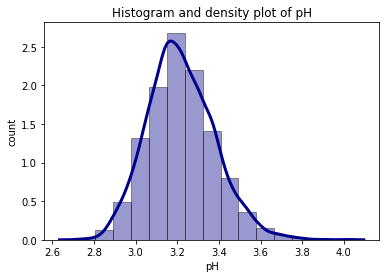

In [78]:
sns.distplot(wine['pH'], hist=True, kde=True, 
             bins=15, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3})

plt.xlabel('pH')
plt.ylabel('count')
plt.title('Histogram and density plot of pH')
plt.show()

#### fixed acidity across wine types

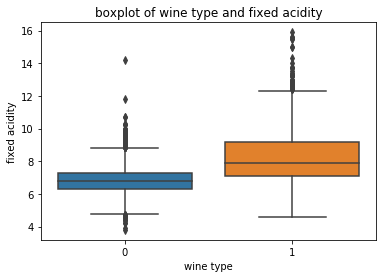

In [79]:
bp = sns.boxplot(x="winetype", y="fixed acidity", data=wine)
plt.xlabel('wine type')
plt.ylabel('fixed acidity')
plt.title('boxplot of wine type and fixed acidity')
plt.show()

#### chlorides across wine types

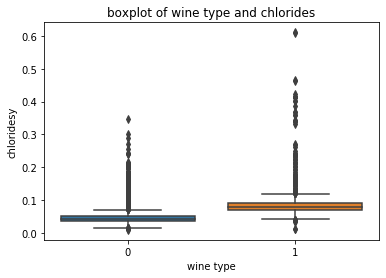

In [80]:
bp = sns.boxplot(x="winetype", y="chlorides", data=wine)
plt.xlabel('wine type')
plt.ylabel('chloridesy')
plt.title('boxplot of wine type and chlorides')
plt.show()

#### pH across wine types

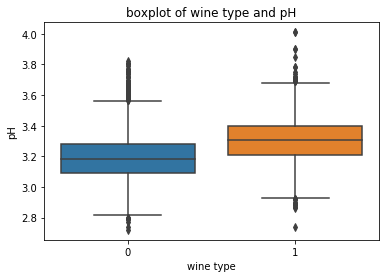

In [81]:
bp = sns.boxplot(x="winetype", y="pH", data=wine)
plt.xlabel('wine type')
plt.ylabel('pH')
plt.title('boxplot of wine type and pH')
plt.show()

### 2.2 Split data into training and test set. Build models that evaluate the relationship between all available X variables in the dataset and the target variable. Evaluate Logistic Regression, Penalized Logistic Regression, and KNN for classification using cross-validation. How different are the results? How does scaling the data with StandardScaler influence the results?

#### split data

In [82]:
X = wine.drop(['winetype'], axis=1)
y = wine.loc[:,'winetype']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

#### logistic regression

In [83]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression().fit(X_train, y_train) 

from sklearn.model_selection import cross_val_score
print("logreg .coef_: {}".format(logreg .coef_))
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

#cv
from sklearn.model_selection import cross_val_score
print("Cross Validation score: {}".format(cross_val_score(LogisticRegression(),X_train,y_train).mean()))

logreg .coef_: [[ 0.68344872  8.139135   -0.88764864 -0.14745031  2.35939363  0.05149144
  -0.06411727 -3.09594885  2.36848977  6.13790089 -0.74951693 -0.1373309 ]]
Training set score: 0.983
Test set score: 0.977
Cross Validation score: 0.9815278474119701


#### penalized logistic regression

In [84]:
#with l1 penalty
from sklearn.linear_model import LogisticRegression
logreg_l1 = LogisticRegression(penalty='l1').fit(X_train, y_train) 
print("logreg .coef_: {}".format(logreg_l1.coef_))
print("Training set score: {:.3f}".format(logreg_l1.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg_l1.score(X_test, y_test)))

#cv
from sklearn.model_selection import cross_val_score
print("Cross Validation score: {}".format(cross_val_score(LogisticRegression(penalty='l1'),X_train,y_train).mean()))

logreg .coef_: [[ 0.91351569 11.47322705  0.         -0.12565319 15.1722649   0.05932942
  -0.0666706  -9.00192895  4.74766114  8.37517848 -0.61422477 -0.04827907]]
Training set score: 0.988
Test set score: 0.985
Cross Validation score: 0.985222429626662


#### knn

In [85]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier().fit(X_train, y_train)
print("Training set score: {:.3f}".format(knn.score(X_train, y_train)))
print("Test set score: {:.3f}".format(knn.score(X_test, y_test)))

#cv
from sklearn.model_selection import cross_val_score
print("Cross Validation score: {}".format(cross_val_score(KNeighborsClassifier(),X_train,y_train).mean()))

Training set score: 0.958
Test set score: 0.936
Cross Validation score: 0.9373987478375265


#### How different are the results?
Among the models above, penalized logistic regression has the best performance based on accuracy, the second is logistic regression and the last one is knn.

#### scaling the data

In [86]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [87]:
#logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression().fit(X_train_scaled, y_train) 
print("logreg .coef_: {}".format(logreg.coef_))
print("Training set score: {:.3f}".format(logreg.score(X_train_scaled, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test_scaled, y_test)))

#cv
from sklearn.model_selection import cross_val_score
print("Cross Validation score: {}".format(cross_val_score(LogisticRegression(),X_train_scaled,y_train).mean()))

logreg .coef_: [[ 0.2804866   1.22466779 -0.3620574  -3.29074973  0.75132094  0.92718852
  -2.85285884  3.55492351  0.25562098  0.58835542  1.22168097  0.18202624]]
Training set score: 0.994
Test set score: 0.992
Cross Validation score: 0.9932263468077732


In [88]:
#with l1 penalty
from sklearn.linear_model import LogisticRegression
logreg_l1 = LogisticRegression(penalty='l1').fit(X_train_scaled, y_train) 
print("logreg .coef_: {}".format(logreg_l1.coef_))
print("Training set score: {:.3f}".format(logreg_l1.score(X_train_scaled, y_train)))
print("Test set score: {:.3f}".format(logreg_l1.score(X_test_scaled, y_test)))

#cv
from sklearn.model_selection import cross_val_score
print("Cross Validation score: {}".format(cross_val_score(LogisticRegression(penalty='l1'),X_train_scaled,y_train).mean()))


logreg .coef_: [[-0.02971269  1.17994703 -0.39719359 -4.5201291   0.74248234  1.15560022
  -3.05910434  4.64795083  0.          0.48665389  1.76759884  0.16720083]]
Training set score: 0.994
Test set score: 0.993
Cross Validation score: 0.9936366032180297


In [89]:
#knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier().fit(X_train_scaled, y_train)
print("Training set score: {:.3f}".format(knn.score(X_train_scaled, y_train)))
print("Test set score: {:.3f}".format(knn.score(X_test_scaled, y_test)))

#cv
from sklearn.model_selection import cross_val_score
print("Cross Validation score: {}".format(cross_val_score(KNeighborsClassifier(),X_train_scaled,y_train).mean()))

Training set score: 0.995
Test set score: 0.991
Cross Validation score: 0.9926103300174306


#### How does scaling the data with StandardScaler influence the results?
The accuracy of all these models improved, and knn model had the largest improvement in accuracy, as it was affected most because the variance of varibles are pretty different. Now the 3 models have only slight different in accuracy.

### 2.3 Tune the parameters where possible using GridSearchCV. Do the results improve?

In [90]:
from sklearn.model_selection import GridSearchCV
import numpy as np

In [112]:
#logistic regression
param_grid = {'C': [0.01,1,100,1e90]} 
from sklearn.model_selection import StratifiedKFold
grid = GridSearchCV(LogisticRegression(), param_grid=param_grid,cv=StratifiedKFold())
grid.fit(X_train_scaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.3f}".format(grid.score(X_test_scaled, y_test)))

best mean cross-validation score: 0.994
best parameters: {'C': 100}
test-set score: 0.993


In [109]:
#penalized logistic regression
param_grid = {'C': [0.01,1,100,1e90]} 
from sklearn.model_selection import StratifiedKFold
grid = GridSearchCV(LogisticRegression(penalty='l1'), param_grid=param_grid,cv=StratifiedKFold())
grid.fit(X_train_scaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.3f}".format(grid.score(X_test_scaled, y_test)))

best mean cross-validation score: 0.994
best parameters: {'C': 1}
test-set score: 0.993


In [111]:
#knn
param_grid = {'n_neighbors': np.arange(1, 15, 2)} 
from sklearn.model_selection import StratifiedKFold
grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid,cv=StratifiedKFold())
grid.fit(X_train_scaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.3f}".format(grid.score(X_test_scaled, y_test)))

best mean cross-validation score: 0.994
best parameters: {'n_neighbors': 11}
test-set score: 0.991


#### Do the result improve? 
Yes, the best mean cross-validation score improved by around 0.001-0.002 for logistic regression, penalized logisitic regression and knn.

### 2.4 Change the cross-validation strategy in GridSearchCV from ‘stratified k-fold’ to ‘kfold’ with shuffling. Do the best parameters for models that can be tuned change? 

In [95]:
#logistic regression
from sklearn.model_selection import KFold
param_grid = {'C': [0.01,1,100,1e90]} 
grid = GridSearchCV(LogisticRegression(), param_grid=param_grid, cv=KFold(shuffle=True))
grid.fit(X_train_scaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.3f}".format(grid.score(X_test_scaled, y_test)))

best mean cross-validation score: 0.994
best parameters: {'C': 1}
test-set score: 0.992


In [108]:
#penalized logistic regression
from sklearn.model_selection import KFold
param_grid = {'C': [0.01,1,100,1e90]} 
grid = GridSearchCV(LogisticRegression(penalty='l1'), param_grid=param_grid, cv=KFold(shuffle=True))
grid.fit(X_train_scaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.3f}".format(grid.score(X_test_scaled, y_test)))

best mean cross-validation score: 0.994
best parameters: {'C': 1}
test-set score: 0.993


In [107]:
#knn
from sklearn.model_selection import KFold
param_grid = {'n_neighbors': np.arange(1, 15, 2)} 
grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=KFold(shuffle=True))
grid.fit(X_train_scaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.3f}".format(grid.score(X_test_scaled, y_test)))

best mean cross-validation score: 0.993
best parameters: {'n_neighbors': 3}
test-set score: 0.993


#### Do the best parameters for models that can be tuned change?
The best parameters changed for logistic regression (from C=100 to C=1) but didn't change for penalized logisitc regression (still C=1) and changed for knn(from n_neighbors=11 to n_neighbors=3).

### 2.5 Lastly, compare the coefficients for Logistic Regression and Penalized Logistic Regression and discuss which final model you would choose to predict new data.

In [99]:
#logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1)
logreg.fit(X_train_scaled, y_train)
print("logreg.coef_: {}".format(logreg.coef_))

logreg.coef_: [[ 0.2804866   1.22466779 -0.3620574  -3.29074973  0.75132094  0.92718852
  -2.85285884  3.55492351  0.25562098  0.58835542  1.22168097  0.18202624]]


In [102]:
#penalized logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1,penalty='l1')
logreg.fit(X_train_scaled, y_train)
print("logreg.coef_: {}".format(logreg.coef_))

logreg.coef_: [[-0.03301966  1.17896145 -0.39761454 -4.53550055  0.74286843  1.15650121
  -3.05988967  4.66304446  0.          0.48524562  1.77467601  0.16742793]]


#### Discuss which final model you would choose to predict new data.
I will use penalized logistic regression with l1 penality and C=1 as it has the highest mean cross-validation score and remove a variable compared with logistic regression, which makes it more compact. And it's easier to explain compared with knn.